<h1> Aunalytics Data Science Exercise, Part - II </h1>
<h2> Name: Prem Patel</h2>
<h2> Date: 04/25/2021 </h2>

<b>Objective:</b> Perform a segmentation study on the dataset to display useful information using any visualization library.

In [75]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [76]:
# reading data
test = pd.read_csv("au_test.csv")
train = pd.read_csv("au_train.csv")

# merging the data for this study
df = test.append(train)

# since we already know the steps to clean the data, we will directly implement them

# trimming white spaces in the data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# replacing '?' with 'NaN'
df = df.replace('?', np.NaN)

# removing null rows
df = df.dropna()

# fixing class category
df["class"] = df["class"].replace('<=50K.', '<=50K')
df["class"] = df["class"].replace('>50K.', '>50K')

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [77]:
# creating some categories from continuous variables for convenience

# age bins
bins = [0,20,30,50,90]
group_names = ['Young (<20)','Young Adult (21-30)','Adult (31-50)','Old (51-90)']
df['age_new'] = pd.cut(df['age'], bins, labels=group_names)

# 'hours-per-week' bins
bins = [0,39,40,99]
group_names = ['<40','40','>40']
df['hours_per_week_new'] = pd.cut(df['hours-per-week'], bins, labels=group_names)

# Categorizing capital gain and capital loss into Boolean
df['new_capital-loss'] = [0 if capital==0 else 1 for capital in df['capital-loss']]
df['new_capital-gain'] = [0 if capital==0 else 1 for capital in df['capital-gain']]

<h2> Univariate Plots </h2>

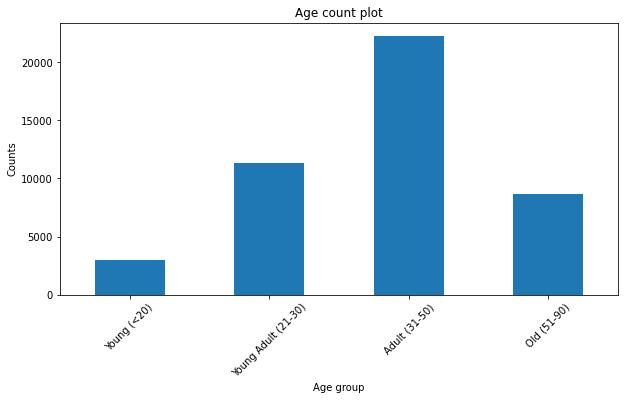

In [78]:
# age distributing of the study

ax = df['age_new'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title="Age count plot")
ax.set_xlabel("Age group")
ax.set_ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

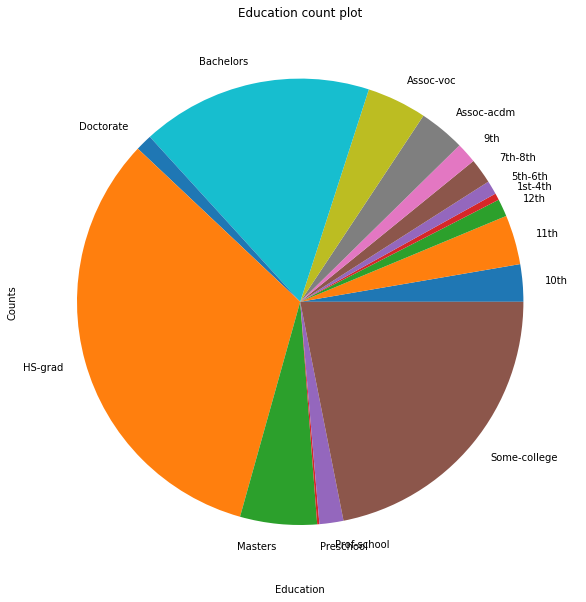

In [79]:
# education distribution of the study

ax = df['education'].value_counts().sort_index().plot(kind='pie',figsize=(10,20),title="Education count plot")
ax.set_xlabel("Education")
ax.set_ylabel("Counts")
#plt.xticks(rotation = 45)
plt.show()

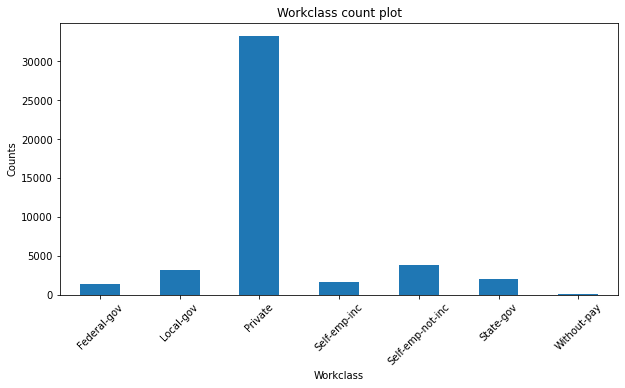

In [80]:
# workclass distribution of the study

ax = df['workclass'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title="Workclass count plot")
ax.set_xlabel("Workclass")
ax.set_ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

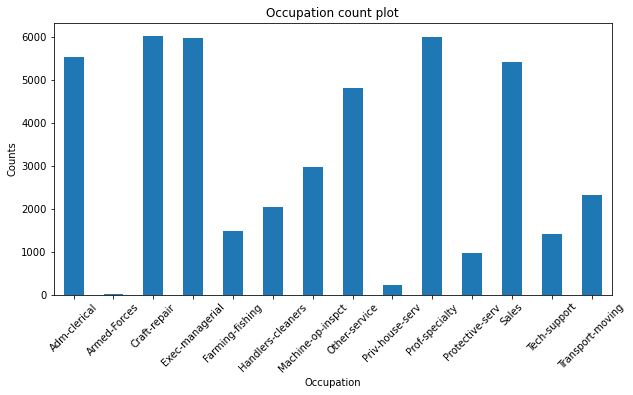

In [81]:
# occupation distribution of the study

ax = df['occupation'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title="Occupation count plot")
ax.set_xlabel("Occupation")
ax.set_ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

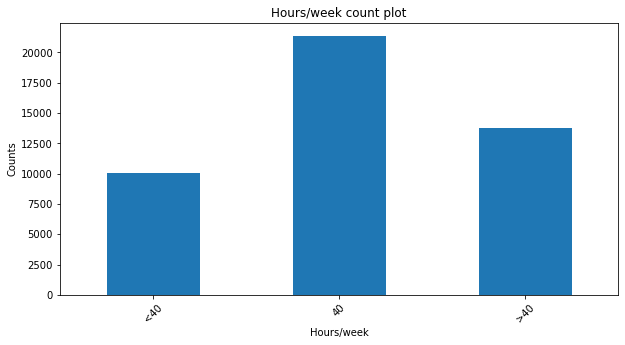

In [82]:
# hours-per-week distribution of the study

ax = df['hours_per_week_new'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title="Hours/week count plot")
ax.set_xlabel("Hours/week")
ax.set_ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

<h2> Bivariate analysis </h2>
Since the study is to predict income, 'class' variable will be compared with others

Text(0, 0.5, 'Percentage of Income')

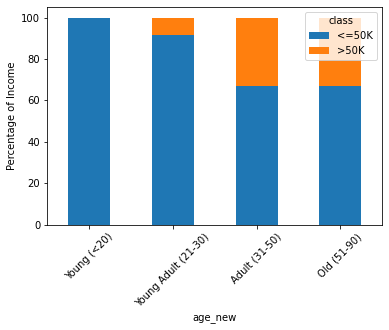

In [83]:
# income x age_group

diff_categ_count = df['age_new'].value_counts()

group_table = df.groupby(['age_new','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100

group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

<b>Inference: </b>
People over 30 years tend to make more then 50K a year, which is understandable since salary increments with the work experience one has.

Text(0, 0.5, 'Percentage of Income')

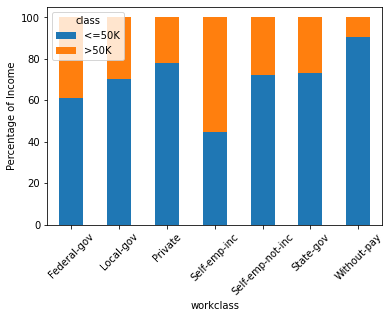

In [84]:
# income x workclass

diff_categ_count=df['workclass'].value_counts()

group_table=df.groupby(['workclass','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

In order to understand the occupations better, we will merge certain categories to simplify.

Text(0, 0.5, 'Percentage of Income')

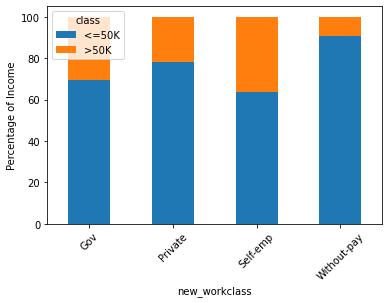

In [85]:
# creating a new column
df['new_workclass'] = df['workclass']
df['new_workclass'].replace({'Local-gov':'Gov','State-gov':'Gov','Federal-gov':'Gov',
                             'Self-emp-not-inc':'Self-emp','Self-emp-inc':'Self-emp'}, inplace=True)


diff_categ_count=df['new_workclass'].value_counts()

group_table=df.groupby(['new_workclass','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

<b>Inference: </b>
People with who are self starters/business or belong to government jobs earn more than 50K a year and one of the least playing jobs are from the private sector

Text(0, 0.5, 'Percentage of Income')

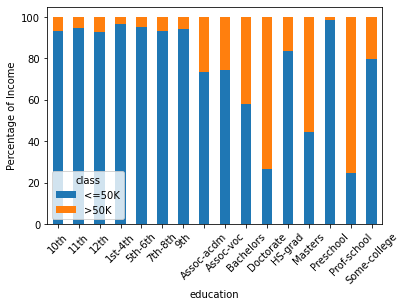

In [86]:
# age x education
diff_categ_count=df['education'].value_counts()

group_table=df.groupby(['education','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

<b>Inference:</b> We would expect the segment of >50K to increase with increase in the education level but it isn't the case.

Text(0, 0.5, 'Percentage of Income')

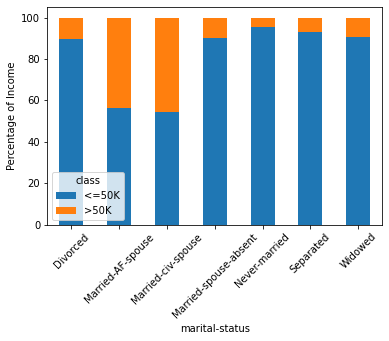

In [87]:
# age x marital_status
diff_categ_count=df['marital-status'].value_counts()

group_table=df.groupby(['marital-status','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

<b>Inference: </b> Married people tend to make more than 50K a year than others but we might need to check the raw numbers in order to weigh percentages too.

Text(0, 0.5, 'Percentage of Income')

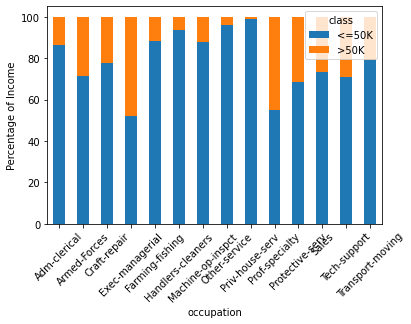

In [88]:
# age x occupation
diff_categ_count=df['occupation'].value_counts()

group_table=df.groupby(['occupation','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

Text(0, 0.5, 'Percentage of Income')

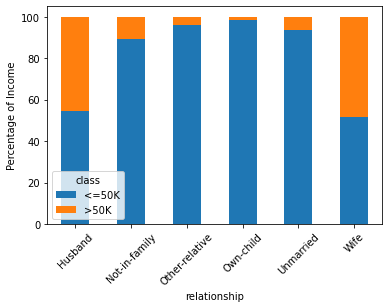

In [89]:
# age x relationship
diff_categ_count=df['relationship'].value_counts()

group_table=df.groupby(['relationship','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

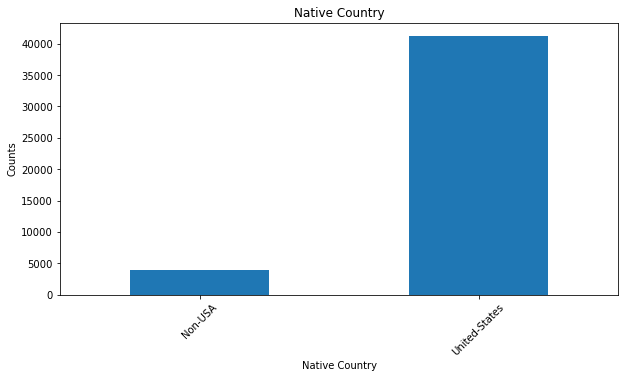

In [90]:
# age x native country

# since we have mutiple different countries with fewer values, we will combine them

df['native-country'] = ['Non-USA' if country!= 'United-States' else 'United-States' 
                        for country in df['native-country']]


ax = df['native-country'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title="Native Country")
ax.set_xlabel("Native Country")
ax.set_ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Percentage of Income')

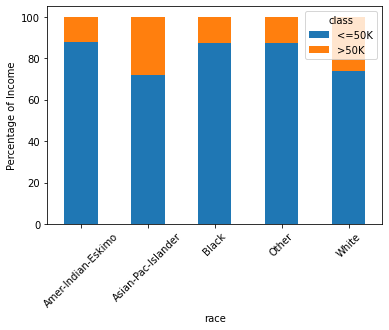

In [91]:
# age x race
diff_categ_count=df['race'].value_counts()

group_table=df.groupby(['race','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

<b>Inference: </b> This graph is interesting but could be highly misleading because the number of non-USA data points are low so the race cannot be a good indicator because of the lack of data points for non-USA.

Text(0, 0.5, 'Percentage of Income')

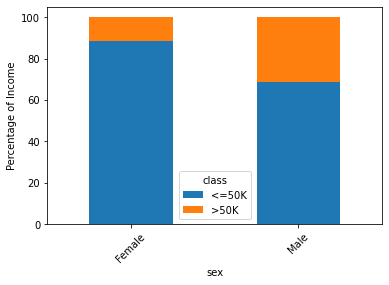

In [92]:
# age x sex
diff_categ_count=df['sex'].value_counts()

group_table=df.groupby(['sex','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

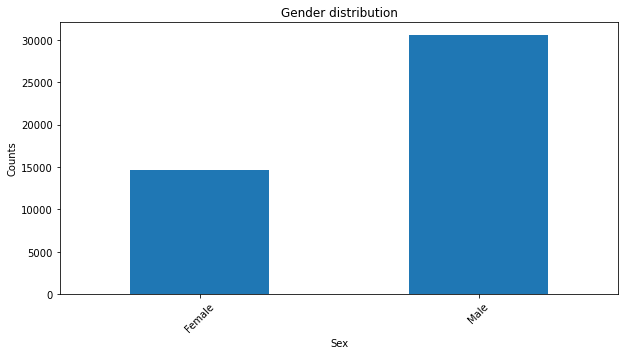

In [93]:
# gender

ax = df['sex'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title="Gender distribution")
ax.set_xlabel("Sex")
ax.set_ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

Due to the skewness in the distributing in sex, we cannot assume that males tend to earn more than 50K than females. 

Text(0, 0.5, 'Percentage of Income')

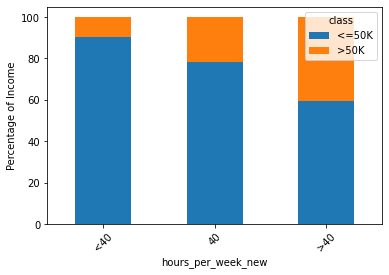

In [94]:
# age x hours_per_week
diff_categ_count=df['hours_per_week_new'].value_counts()

group_table=df.groupby(['hours_per_week_new','class']).size().astype(float)

for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
        
group_table.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.ylabel('Percentage of Income')

The above graphs are a good indicator on how different types of people with different demographic information contribute to their class segmentation of earing more than 50K a year.